In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import metpy

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
msg_file = '/home/ck/DIR/cornkle/data/EUMDAC_MSG_TESTS/HRSEVIRI_20240130T093010Z_20240130T094243Z_epct_e27dc2f7_FC.nc'

In [4]:
msg = xr.open_dataset(msg_file)

In [5]:
# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
dat = msg.metpy.parse_cf(['channel_1'])

In [6]:
dat.x.shape

(2520,)

In [ ]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.Geostationary())
plt.contourf(dat.x, dat.y, dat['channel_1'], transform=ccrs.Geostationary(), cmap='jet')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


In [8]:
from pyproj import Proj
p = Proj(proj='geos', h='35786023.0', lon_0='0', sweep='x')

cord_grid = np.meshgrid(dat['x'].values, dat['y'].values)
lons, lats = p(cord_grid[0], cord_grid[1], inverse=True)

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/crs.py:414: RuntimeWarning: invalid value encountered in remainder
  x[to_180] = (((x[to_180] + 180) % 360) - 180)
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


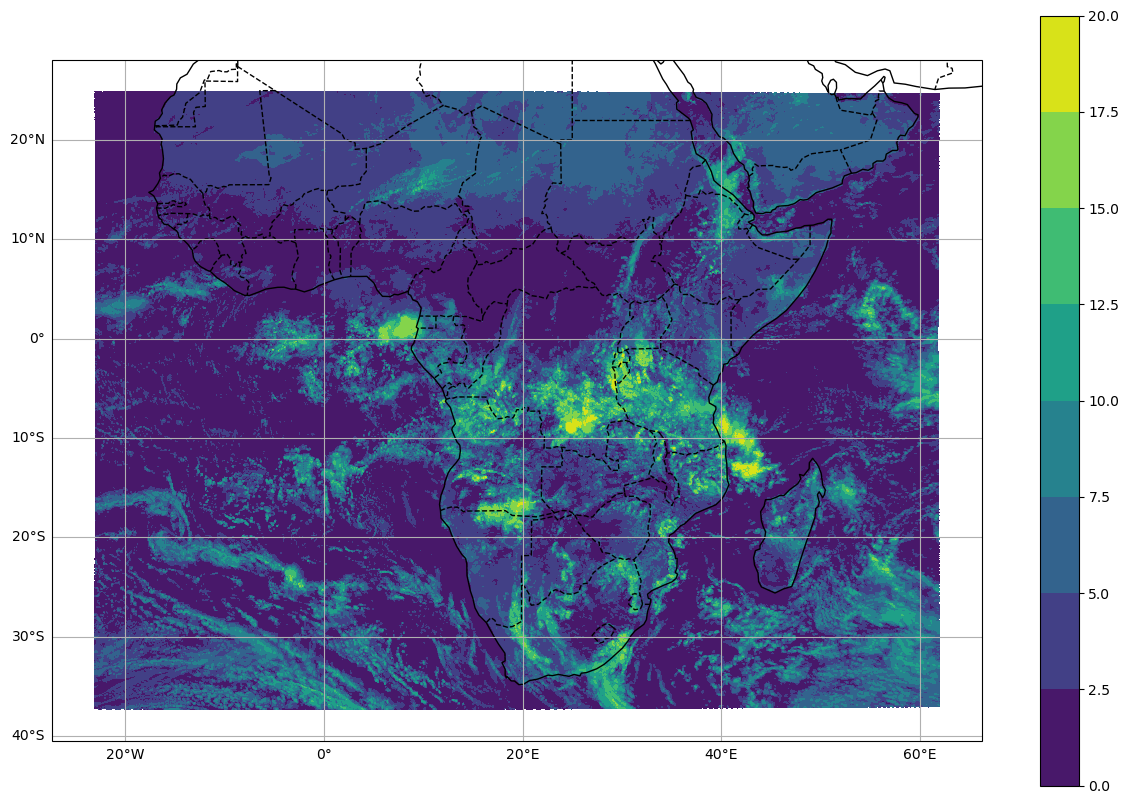

In [12]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(lons, lats, dat['channel_1'], transform=ccrs.PlateCarree())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()